In [4]:
%load_ext autoreload
%autoreload 2

In [9]:
import torch
import numpy as np
import matplotlib.pyplot as plt

In [306]:
from utils.make_data import generate_autoregressive_forecast_dataset
from models.conformal import nonconformity, cover, ConformalForecaster

## Generate datasets

In [307]:
train_dataset = generate_autoregressive_forecast_dataset(n_samples=1000, seq_len=100, horizon=20)
calibration_dataset = generate_autoregressive_forecast_dataset(n_samples=1000, seq_len=100, horizon=20)
test_dataset = generate_autoregressive_forecast_dataset(n_samples=100, seq_len=100, horizon=20)

## Conformal forecaster

In [308]:
model = ConformalForecaster(embedding_size=8, horizon=10, error_rate=0.05)

In [309]:
from models.conformal import nonconformity, cover, ConformalForecaster
model = ConformalForecaster(embedding_size=8, horizon=20, error_rate=0.05)
model.fit(train_dataset, calibration_dataset, epochs=10, lr=0.01, batch_size=100)

Epoch: 0	Train loss: 122.16824111938476


In [315]:
coverages, intervals = model.evaluate_coverage(test_dataset)
print('% of series within predicted intervals: {}'.format(torch.mean(coverages.float(), dim=0).item()))

% of series within predicted intervals: 0.9399999976158142


In [108]:
false_idx = np.nonzero(np.invert(c))[0]

1421
3083
3195
1343
1104
1920
3917
685
3223
1043


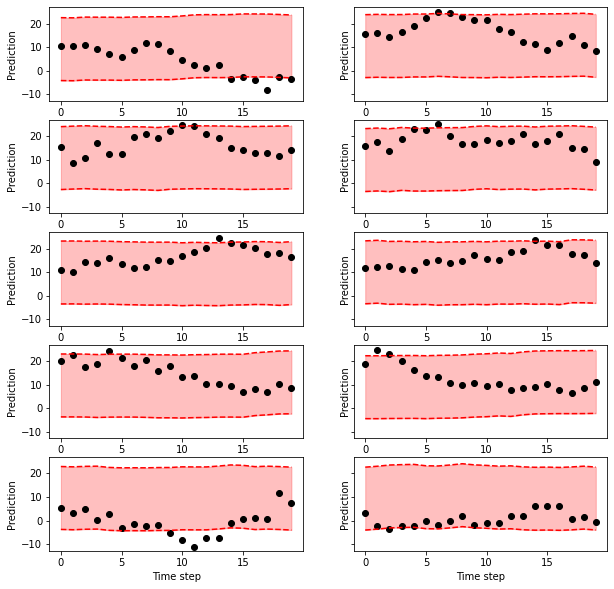

In [109]:
fig, axs = plt.subplots(5, 2, figsize=(10, 10), sharey=True)

for ax in axs.flat:
    i = np.random.choice(false_idx)
    ax.fill_between(range(test_dataset[i][1].size(0)),
                     predictions[i][:, 0].detach().numpy(), 
                     predictions[i][:, 1].detach().numpy(), 
                     color="r", alpha=0.25)
    ax.plot(predictions[i][:, 0].detach().numpy(), linestyle="--", color="r")
    ax.plot(predictions[i][:, 1].detach().numpy(), linestyle="--", color="r")
    # plt.plot(Y_predicted[0][0], linestyle="--", linewidth=3, color="r")

    ax.scatter(range(test_dataset[i][1].size(0)), test_dataset[i][1].detach().numpy(), color="black")
    
    ax.set(xlabel='Time step', ylabel='Prediction')

## Shorter training intervals

Set `seq_len=10` and predict for horizon of 10 time steps.

In [87]:
train_dataset_short = generate_autoregressive_forecast_dataset(n_samples=1000, seq_len=10, horizon=10)
calibration_dataset_short = generate_autoregressive_forecast_dataset(n_samples=1000, seq_len=10, horizon=10)
test_dataset_short = generate_autoregressive_forecast_dataset(n_samples=5000, seq_len=10, horizon=10)

In [88]:
model_short = ConformalForecaster(embedding_size=8, horizon=10, error_rate=0.05)

In [77]:
model_short.fit(train_dataset_short, calibration_dataset_short, epochs=100, lr=0.01, batch_size=100)
model_short.eval()
c_short = []
predictions_short = []
for sequences, target in test_dataset:
    sequences = sequences.unsqueeze(dim=0)
    out = model(sequences).squeeze()
    pred = torch.vstack([out - model.critical_calibration_scores,
                         out + model.critical_calibration_scores]).T
    predictions_short.append(pred)
    c_short.append(cover(pred, target))
print('% of series within predicted intervals: {}'.format(np.mean(c)))

NameError: name 'model_short' is not defined

In [92]:
print('% of series within predicted intervals: {}'.format(np.mean(c_short)))

% of series within predicted intervals: 0.7308


In [60]:
false_idx = np.nonzero(np.invert(c_short))[0]

fig, axs = plt.subplots(5, 2, figsize=(10, 10), sharey=True)

for ax in axs.flat:
    i = np.random.choice(false_idx)
    print(i)
    ax.fill_between(range(test_dataset[i][1].size(0)),
                     predictions[i][:, 0].detach().numpy(), 
                     predictions[i][:, 1].detach().numpy(), 
                     color="r", alpha=0.25)
    ax.plot(predictions[i][:, 0].detach().numpy(), linestyle="--", color="r")
    ax.plot(predictions[i][:, 1].detach().numpy(), linestyle="--", color="r")
    # plt.plot(Y_predicted[0][0], linestyle="--", linewidth=3, color="r")

    ax.scatter(range(test_dataset[i][1].size(0)), test_dataset[i][1].detach().numpy(), color="black")
    
    ax.set(xlabel='Time step', ylabel='Prediction')

NameError: name 'c_short' is not defined